# SVM Tree Worksheet

In [27]:
import numpy as np
import pandas as po
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


## Loading data

Load Pima diabetes dataset and split data, with test size being 25% and validation 20%.

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = po.read_csv(url, names=names)


invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

#columns we will use to make predictions 
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# column that we want to predict
y_col = 'class'

# 80-20 train-test split of datset
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# further split X and y of training nto training and validation sets
validation_size = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=0)

## Creating Model

Create a model with sklearn's SVC and a high gamma value

In [17]:
## YOUR CODE HERE
svm = SVC(gamma=1, C=1)
svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Print accuracy of training and validation data

In [18]:
## YOUR CODE HERE
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.79661016949152


Create a model with sklearn's SVC and a low gamma value

In [21]:
## YOUR CODE HERE
svm = SVC(gamma=0.000000001, C=1)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-09, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Print accuracy of training and validation data

In [22]:
## YOUR CODE HERE
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  66.80851063829788
Validation Accuracy is  67.79661016949152


Explain the accuracy results below. 

Low gamma means most of data is considered in hyperplane

## Metrics

Print the confusion matrices (both numeric and visualized)

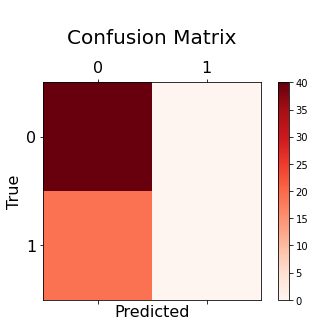

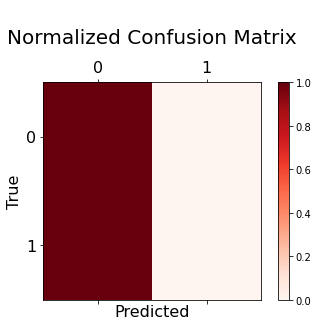

In [32]:
## Confusion matrices

## YOUR CODE HERE
po.crosstab(y_val, y_val_pred, rownames=['True'], colnames=['Predicted'], margins=True)

labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
plot_cmatrix(cm_norm,labels,title='Normalized Confusion Matrix')